# EDA Student Performanace Indicator

### 1) Problem Statement
This project understands how the students performance(test scores) is affected by other variables such as GEnder, Ethnicity, Parental level of education , kunch and Test preparation course.

### 2) Data collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 3) Dataset Information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [8]:
#Read dataset
df = pd.read_csv('StudentsPerformance.csv')

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.shape

(1000, 8)

### 3. Data Checks to perform
- check Missing values
- check Duplicated
- Check data types
- Check the number of unique values of each column
- Check statistics of the dataset
- Check various categories present in the different categories column

In [15]:
# check missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### observation
There are no missing values

In [21]:
# Check duplicates
df.duplicated().sum()

0

#### observation
There are no duplicate values

In [24]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Observation
Starting 5 featues are ibjects that means they are categorical and other are numerical

In [27]:
## #.1 checking the number if unique values of each columns
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [29]:
## Check the statistics of the dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Observation
- From the above description of numerical data, all the means are very close to each other - between 66 and 69
- All the standard deviation are also close - between 14.6 - 15.19
- While there is a minimum of 0 for maths,other are having 17 and 10 value
- There are few students which score 100 in these subjects

In [34]:
## Explore more info about the data
df.head()
# Gives first / Top 5 records

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [40]:
[feature for feature in df.columns if df[feature].dtype != 'O']


['math score', 'reading score', 'writing score']

Using list comprehension we are seperating Numerical featues and categorical features

In [43]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [45]:
numerical_features

['math score', 'reading score', 'writing score']

In [47]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [51]:
## We can even find the number of values in each category
## e.g
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

#### Conclusion
females : 518
Male : 482



In [58]:
## Aggregate the total score with mean

df['total_score'] = df['math score']+df['reading score']+df['writing score']
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Exploring more Visualization

<Axes: xlabel='average', ylabel='Count'>

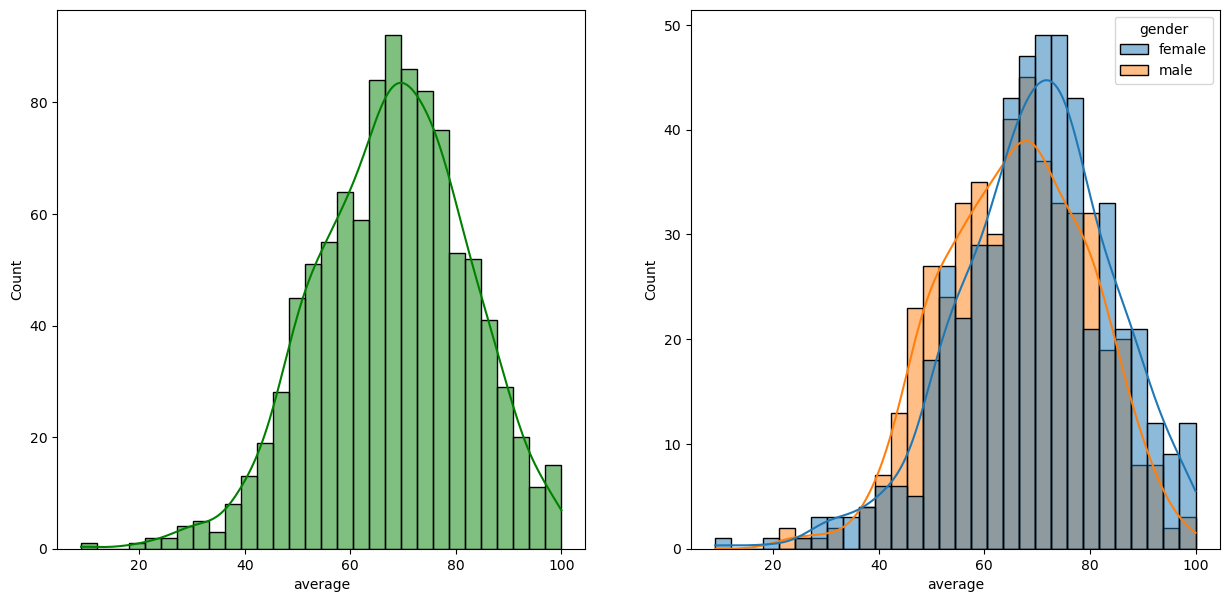

In [63]:
fig,axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)   
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')


#### Observation :
- Female students perform well then male students

<Axes: xlabel='average', ylabel='Count'>

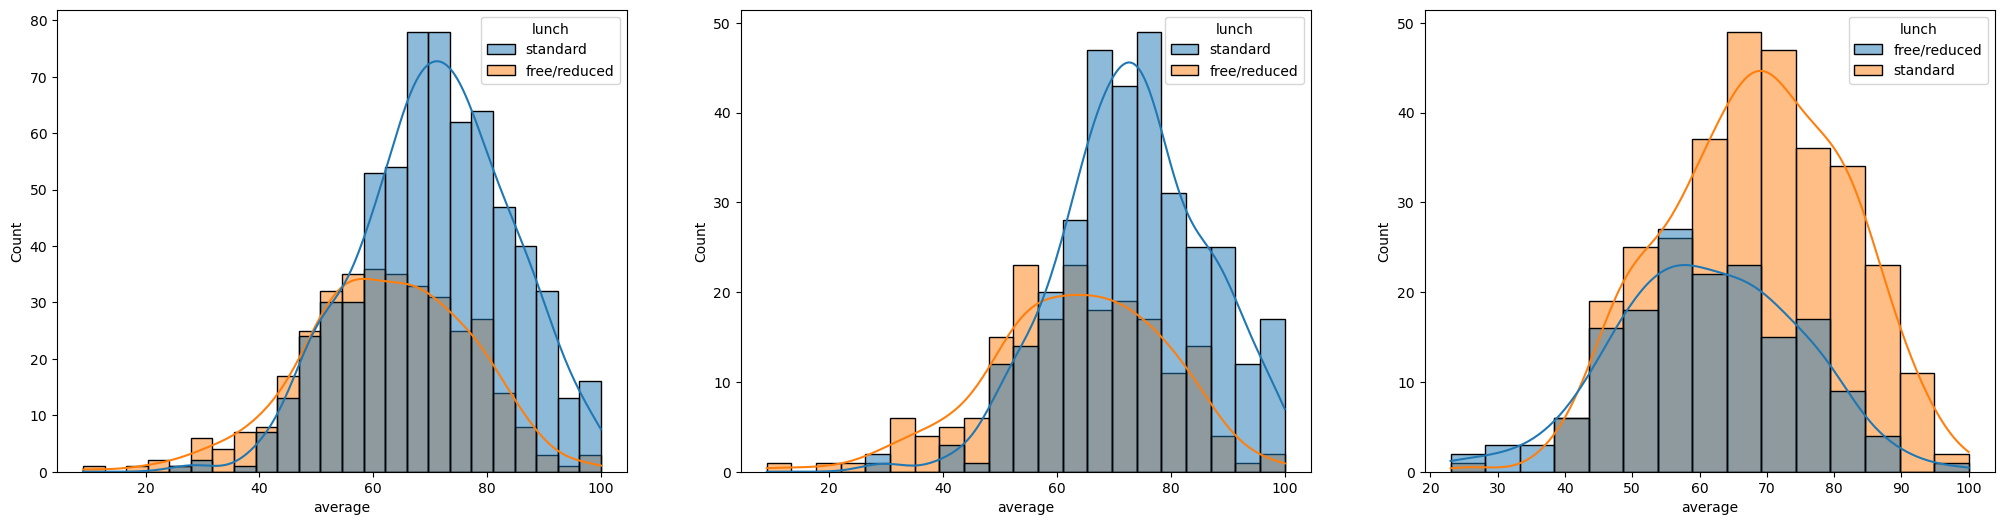

In [68]:
# Lets see the avegare from lunch point of view
fig,axis = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)   
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')


#### Observation
- Standard Lunch help students perform well in exams
- Standard lunch helps perform well in exams be it a male or female

<Axes: xlabel='average', ylabel='Count'>

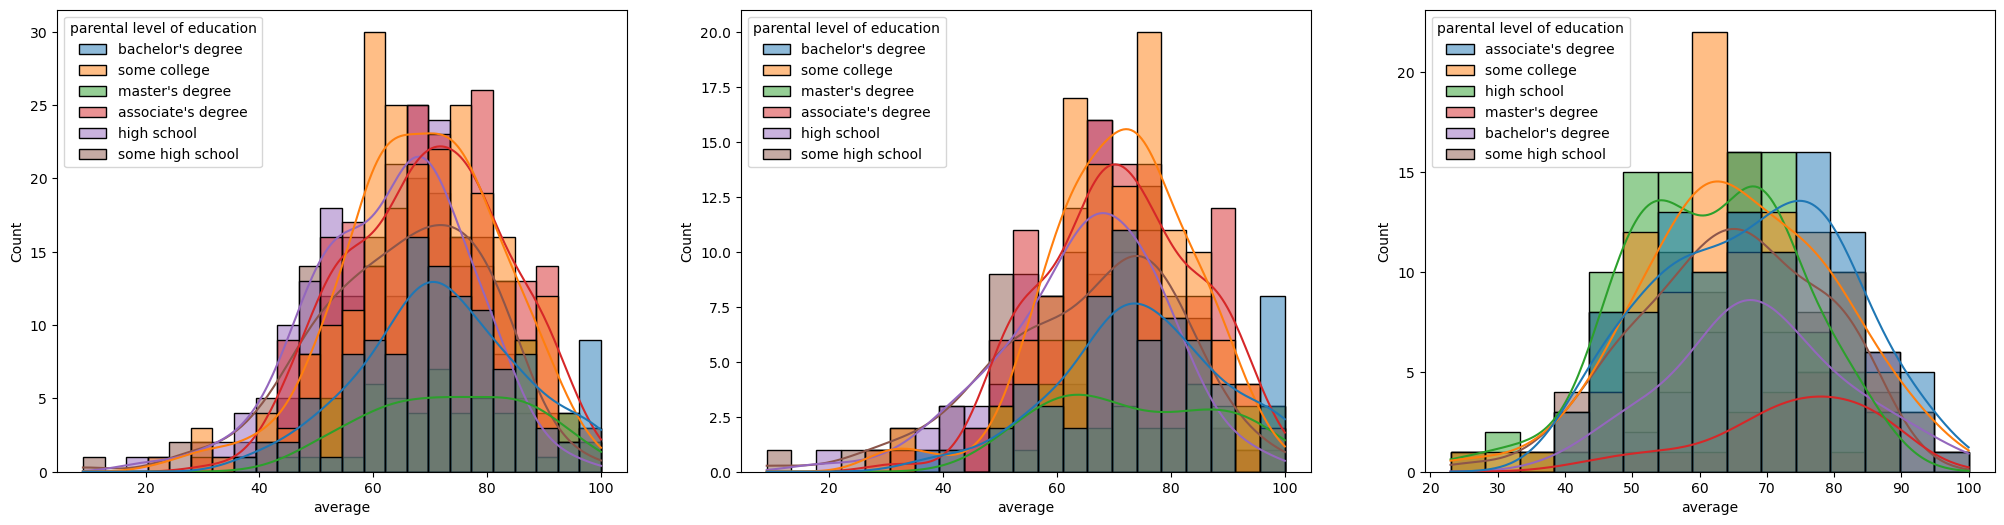

In [71]:
fig,axis = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)   
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')


#### Observation:
- In general parents education dont help student perform well in exam
- 3rd plot shows that parents whose education is of associates degree or masters degree their male child trend to perform well in exam
- 2nd plot we can see there is no effect of parents education on female students

<Axes: xlabel='average', ylabel='Count'>

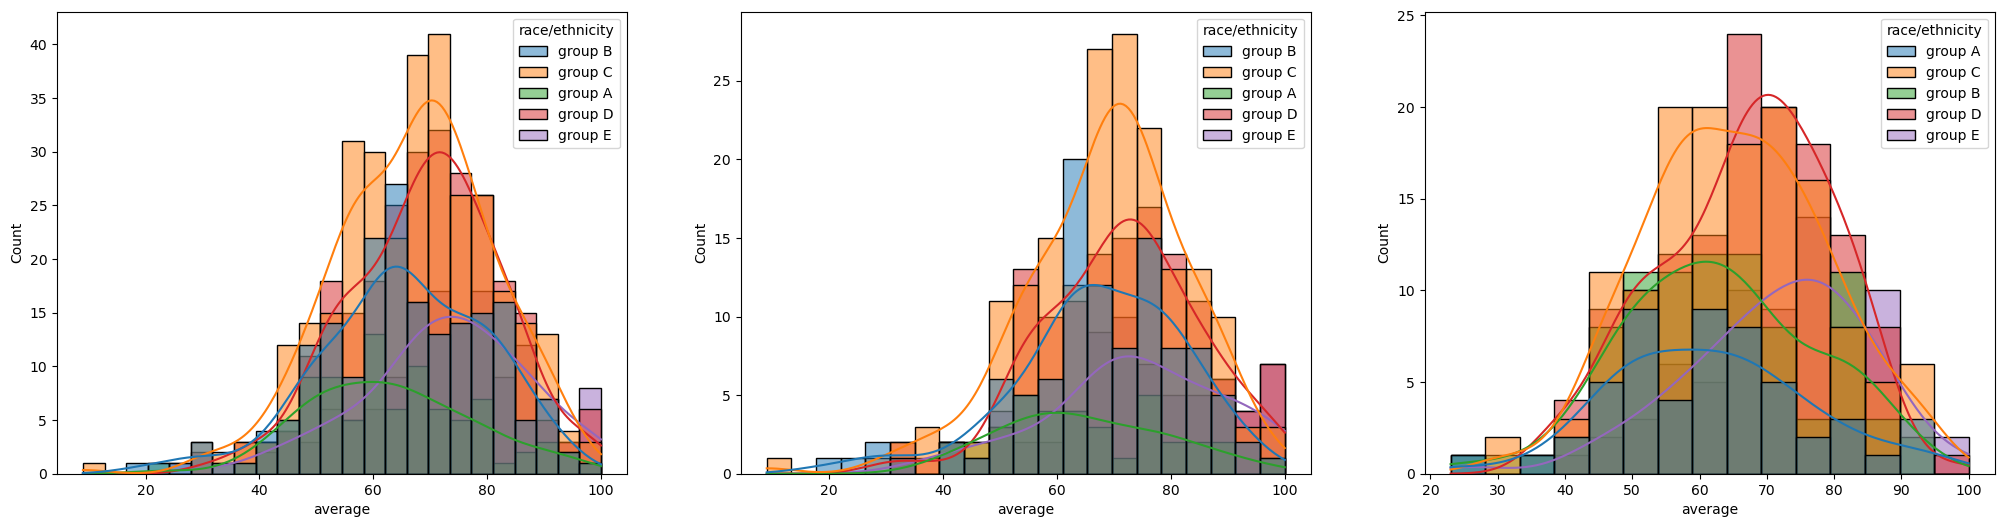

In [74]:
fig,axis = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)   
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')


Observations:
Group A and Group B performs poor in exams irresptive to there gender

In [83]:
df1 = df[['math score','reading score','writing score','total_score','average']]


<Axes: >

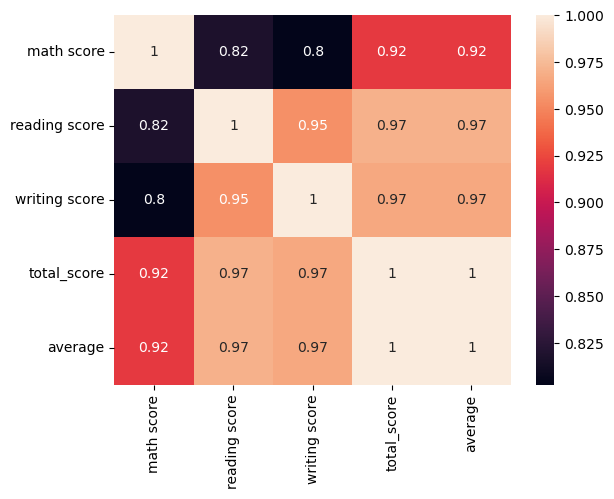

In [87]:
sns.heatmap(df1.corr(),annot=True)

#### Here we got a positive correlation as math score increases, total score increases and avg increases 